In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import glob

In [4]:
file_path = "../Data/chromosomes/chr1.27120000.27895000/hic.clean.1/hic.clean.csv.gz"
df = pd.read_csv(file_path)
df

,i1,j1,fq,pval,fdr,bon,ibp,jbp,rawc
0,1,18,0.311220,0.0,0.0,0.0,27120000,27205000,112.10443
1,2,17,0.307485,0.0,0.0,0.0,27125000,27200000,108.62201
2,3,7,0.997953,0.0,0.0,0.0,27130000,27150000,181.37466
3,4,8,0.998529,0.0,0.0,0.0,27135000,27155000,209.36040
4,4,9,0.998317,0.0,0.0,0.0,27135000,27160000,194.99303
...,...,...,...,...,...,...,...,...,...
12080,153,154,1.000000,1.0,1.0,1.0,27880000,27885000,528.24884
12081,153,155,1.000000,1.0,1.0,1.0,27880000,27890000,282.07100
12082,154,154,1.000000,1.0,1.0,1.0,27885000,27885000,1420.83440
12083,154,155,1.000000,1.0,1.0,1.0,27885000,27890000,396.50110


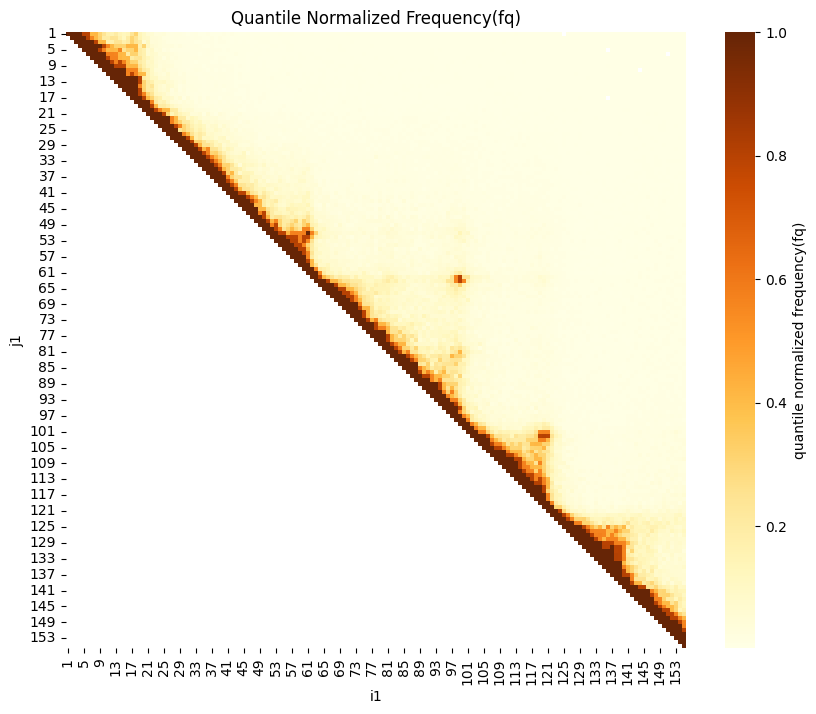

In [27]:
pivot_table = df.pivot(index="i1", columns="j1", values="fq")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, fmt=".2f", cmap="YlOrBr", cbar_kws={'label': 'quantile normalized frequency(fq)'})
plt.title('Quantile Normalized Frequency(fq)')
plt.xlabel('i1')
plt.ylabel('j1')
plt.show()


In [4]:
def matched_chromosome_data(chromosome_name, chromosomeSequence):
    start = chromosomeSequence['start']
    end = chromosomeSequence['end']

    data_dir = f"../Data/"
    file_pattern = f"{data_dir}/{chromosome_name}.*.*"
    matching_files = glob.glob(file_pattern)

    selected_files = []
    for file in matching_files:
        dir_name = os.path.basename(file)
        dir_parts = dir_name.split(".")

        if len(dir_parts) == 3:
            try:
                file_start = int(dir_parts[1])
                file_end = int(dir_parts[2])
            except ValueError:
                print(f"Skipping file due to invalid format: {file}")
                continue

            # Check if the file is within the provided range
            if file_start >= start and file_end <= end:
                folder_path = os.path.join(file, 'hic.clean.1', 'hic.clean.csv.gz')
                selected_files.append(folder_path)
        else:
            print(f"Skipping file due to insufficient parts: {file}")
    
    data_frames = [pd.read_csv(file) for file in selected_files]
    
    if data_frames:
        chromosome_data_df = pd.concat(data_frames, ignore_index=True)
    else:
        chromosome_data_df = pd.DataFrame()
    
    return chromosome_data_df

result = matched_chromosome_data('chr2', {"start": 6400000, "end": 100000000000})
result

,i1,j1,fq,pval,fdr,bon,ibp,jbp,rawc
0,14,44,0.307160,0.0,0.0,0.0,230870000,231020000,82.357970
1,14,45,0.246168,0.0,0.0,0.0,230870000,231025000,79.109290
2,58,64,0.799956,0.0,0.0,0.0,231090000,231120000,131.982510
3,58,66,0.562411,0.0,0.0,0.0,231090000,231130000,105.293290
4,58,133,0.137885,0.0,0.0,0.0,231090000,231465000,62.791737
...,...,...,...,...,...,...,...,...,...
30875,128,129,1.000000,1.0,1.0,1.0,65080000,65085000,294.338470
30876,128,130,0.998490,1.0,1.0,1.0,65080000,65090000,162.986500
30877,129,129,1.000000,1.0,1.0,1.0,65085000,65085000,890.938050
30878,129,130,1.000000,1.0,1.0,1.0,65085000,65090000,453.813050
